In [259]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import math
import import_ipynb

import utils

In [260]:
def compute_resistence(vi, vo):
    return (vi - vo) * (2000 / vo)

In [264]:
def get_resistance(data):
    resistances = []
    for i in range(len(data[0])):
        if (data[1][i] == 0):
            continue
#         print(data)
        resistances.append(compute_resistence(data[0][i], data[1][i]))
    if (len(resistances) < 5):
        return -1
    return sum(resistances) / len(resistances)
    
filename = "data/2_16_100"
# print(get_resistance(filename))
data_set = split_file(filename)
# print(data_set)
# print(get_resistance(data_set))
for data in data_set:
   print(get_resistance(data))
# print(data)


21310.51183565303
16013.109772568301
5158.281227738469
23223.459950610726
17585.049975769183
15559.93355186217
5123.659466373612
4585.392533353998
6163.671229037003
4592.560712975104


# stablity of resistance measurement
**ATTENTION: The chip seems need kinda warmup, performance at first not stable**
### Measure a cell's resistance at a certain voltage multi times and plot

In [248]:
def plot_stability(filename):
    data_set = split_file(filename)    
    rs = list(map(lambda data: get_resistance(data), data_set))
    print("avarage is ", sum(rs) / len(rs))
    plt.plot(list(range(len(rs))), rs)


avarage is  5792.800130743263


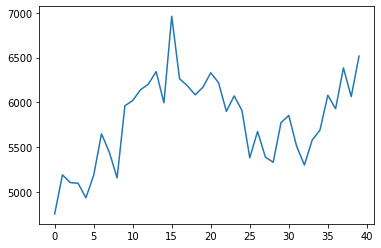

In [249]:
# Chip 2 Cell 16 Voltage 0.1
filename = "data/stability_2_16_100"
plot_stability(filename)

avarage is  720.930766225735


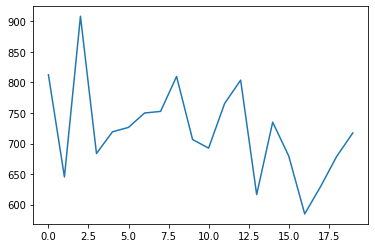

In [250]:
# Chip 2 Cell 16 Voltage 0.4
filename = "data/stability_2_16_400"
plot_stability(filename)

avarage is  494.83582737320404


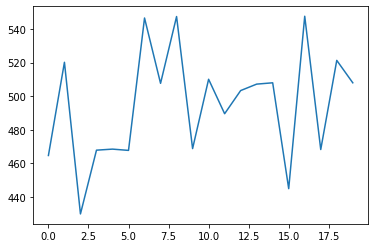

In [251]:
# Chip 2 Cell 16 Voltage 0.8
filename = "data/stability_2_16_800"
plot_stability(filename)

avarage is  364.1351807547284


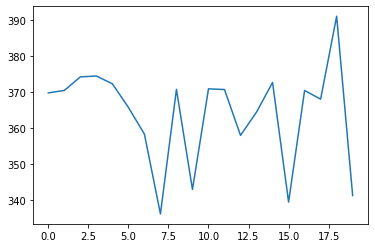

In [252]:
# Chip 2 Cell 16 Voltage 1.2
filename = "data/stability_2_16_1200"
plot_stability(filename)

# Measure resistance in different voltages
*somtime the measurement can be nonsense, for example, with measurement voltage 0.1V the resistance could be really small*

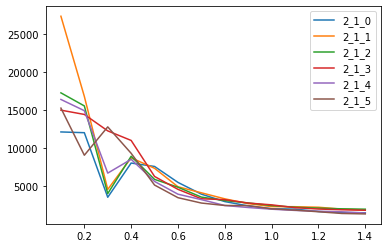

In [258]:
def get_avg_resistance(filename):
    data_set = split_file(filename)
    rs = list(map(lambda data: get_resistance(data), data_set))
    return sum(rs) / len(rs)
# filename = "data/measure_2_1_200"
# get_avg_resistance(filename)


def plot_r(chip, cell, prefix, dir = 0):
    tree = ET.parse('data/meta.xml')
    tests = tree.getroot()
    rs = []
    vs = []
    for test in tests:
        dic = parse_test(test)
        if (int(dic['chip']) != chip or int(dic['cell']) != cell or prefix not in dic['file']):
            continue
        filename = dic['file']
        if (dir != 0):
            filename = "/Users/lwh/CLionProjects/ce_device/test/data/measure_2_1_" + str(dir) + "/" + dic['file'].split("/")[-1]
        r = get_avg_resistance(filename)
        if (r == -1):
            continue
        rs.append(r)
        vs.append((float)(dic['voltage']))
    plt.plot(vs[0:], rs[0:], label=str(chip)+'_'+str(cell)+'_'+str(dir))
    plt.legend()

    
# axes = plt.gca()
# axes.set_ylim([0,3000])
plot_r(2, 1, 'measure', 0)
plot_r(2, 1, 'measure', 1)
plot_r(2, 1, 'measure', 2)
plot_r(2, 1, 'measure', 3)
plot_r(2, 1, 'measure', 4)
plot_r(2, 1, 'measure', 5)



In [ ]:

def parse_test(test):
    dic = {}
    for child in test:
        dic[child.tag] = child.text
    return dic


def plot_r(chip, cell):
    tree = ET.parse('data/meta.xml')
    tests = tree.getroot()
    rs = []
    vs = []
    for test in tests:
        dic = parse_test(test)
        if (int(dic['chip']) != chip or int(dic['cell']) != cell):
            continue
        r = get_resistance(dic['file'])
        if (r == -1):
            continue
        rs.append(r)
        vs.append((float)(dic['voltage']))
    print(rs)
    plt.plot(vs[0:], rs[0:], label=str(chip)+'_'+str(cell))
    plt.legend()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

[52724.871334122334, 1394.4287677348113, 901.2533846846106, 708.2975962317496, 476.28519648446274, 438.1067545173963, 420.0834932662912, 381.7747830177149, 322.77545884494674, 289.75697833430127, 290.642498918168, 288.4254784582982, 251.2712922585258, 241.83560708381475]


<Figure size 432x288 with 0 Axes>

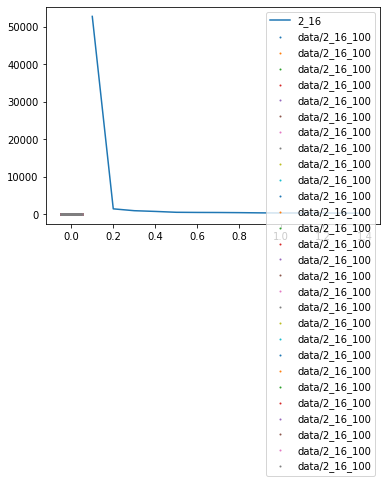

<Figure size 432x288 with 0 Axes>

In [38]:
# axes = plt.gca()
# axes.set_ylim([0,10000])

# for i in range(1, 16):
# #     if (i == 8 or i == 9): continue
#     plot_r(2, i)
#     plt.figure()


    
# plt.figure(figsize=(8, 6), dpi=80)
# axes = plt.gca()
# axes.set_ylim([0,10000])

# plot_r(2, 7)
# plt.figure()

# for i in range(1, 16):
#     if (i == 8 or i == 9): continue
#     plot_r(2, i)

plot_r(2, 16, 'measure')
plt.figure()